### IMPUTING SALARY FROM INDEED.COM.AU SCRAPE.
The notebook reads in two Dataframes containing scraped information from indeed.com.au.

The first Dataframe contains scraped "data science" jobs and the second 'data analyst' jobs. Both have minimal salary information. The decision was made to bootstrap whatever salary information was available and test whether there is any difference between the two sample means. The p value for difference of sample salary means is shown below and is significant at the 99% CI level. Additionally, both Dataframes have a manually imputed salary label column. Ones were manually assigned for salary label within the data science Dataframe and zeros within the data analyst Dataframe.

In addition to bootstrapping the salary information a Kmeans clustering algorithm was used to assign title labels on the basis of job descriptions. The K means algorithm below has two centroids. Silhouette scores did not alter much for higher k. There was also no statistical relationship between the resulting title labels and the salary labels.

Word clouds are produced for the two job title clusters. Visually there looks to be some separation of job titles between the two word clouds.

In [1]:
#Import salary class and isalary.py file from respective folder
from Downloads.isalary import salary as s

In [2]:
#Retreive analyst dataset, data scientist datasetand the  combination of both datasets  
get_analyst_data= s.get_data()[0]
get_data_scientist_data= s.get_data()[1]
get_all_data=s.get_data()[2]

In [3]:
#Call in class methods to process data for salary comparison
get_bootstrap_model= s.bootstrap
clean_all_salaries= s.clean_salary
plot_salaries= s.compare_salaries
get_title_labels= s.create_title_labels
run_chi_square= s.compare_labels
get_wordclouds= s.produce_wordclouds

### Compare salaries for Analyst and Data Scientist

Average Analyst salary: 108038
Average Data Scientist salary: 128742

T-Statistic : difference of the two salary group means.
Ttest_indResult(statistic=-578.5364809435498, pvalue=0.0)



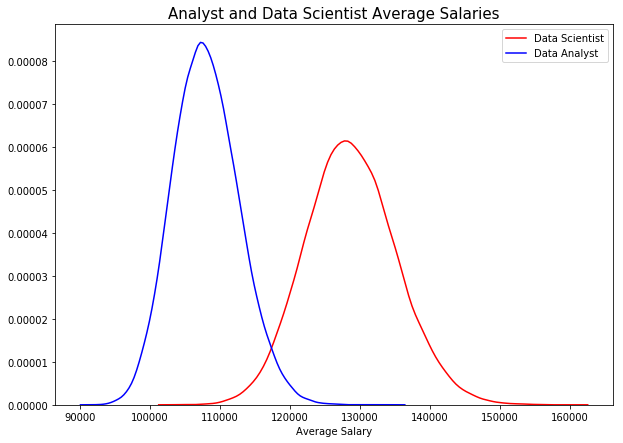

In [4]:
s.compare_salary_bands(get_analyst_data,get_data_scientist_data,
                       get_all_data,get_bootstrap_model,clean_all_salaries,plot_salaries )   

### Compare title labels with salary labels and check if there is a statistical relationship.

Silhouette score for k=2 clusters = 0.2759419697915714

Chi squared test for relationship between title labels and salary labels
Power_divergenceResult(statistic=267.0, pvalue=1.0)




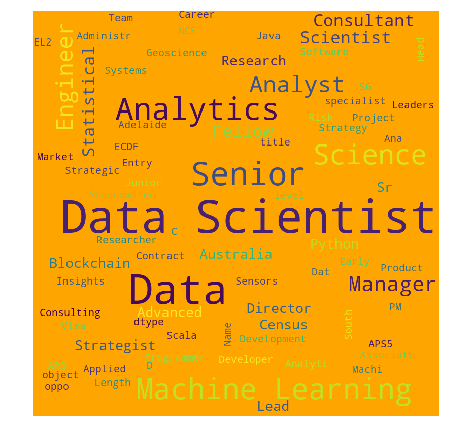

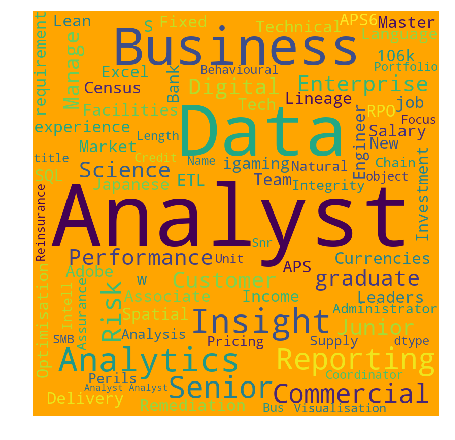

In [5]:
s.compare_title_salary_labels(get_all_data,get_title_labels,
                              run_chi_square,get_wordclouds)